In [1]:
import os
os.chdir(r'C:\Users\User\Desktop\cdac advance modules\pml lecture\Datasets')

Part 1 - Data Preprocessing

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.metrics import mean_squared_error
# Importing the training set
dataset_ts = pd.read_csv('ZILLOW-M1301_MLPSF.csv')

dataset_ts.head()

,Date,Value
0,31-03-2012,180620
1,30-04-2012,195000
2,31-05-2012,192500
3,30-06-2012,199900
4,31-07-2012,199900


In [3]:
dataset_ts.shape

(83, 2)

In [4]:
dataset_train = dataset_ts.iloc[:71,:]
dataset_train.shape

(71, 2)

In [5]:
training_set = dataset_train.iloc[:, 1].values
training_set[:5]

array([180620, 195000, 192500, 199900, 199900], dtype=int64)

Feature Scaling

In [6]:
training_set = training_set.reshape(-1,1)
from sklearn.preprocessing import MinMaxScaler
sc = MinMaxScaler(feature_range = (0, 1))
training_set_scaled = sc.fit_transform(training_set)

In [7]:
training_set_scaled[:5]

array([[0.        ],
       [0.21029541],
       [0.17373501],
       [0.28195379],
       [0.28195379]])

Creating a data structure with timesteps and 1 output

In [8]:
timesteps=5
trn_size = dataset_train.shape[0]

In [9]:
X_train = []
y_train = []
for i in range(timesteps, trn_size):
    X_train.append(training_set_scaled[i-timesteps:i, 0])
    y_train.append(training_set_scaled[i, 0])
X_train, y_train = np.array(X_train), np.array(y_train)


In [10]:
X_train.shape

(66, 5)

In [11]:
X_train[:1]

array([[0.        , 0.21029541, 0.17373501, 0.28195379, 0.28195379]])

In [12]:
y_train[:1]

array([0.28195379])

In [13]:
# Reshaping
X_train = np.reshape(X_train, (X_train.shape[0], X_train.shape[1], 1))

In [14]:
X_train.shape

(66, 5, 1)

Part 2 - Building the RNN

In [15]:
import tensorflow as tf
from tensorflow import keras

In [16]:
(X_train.shape[1],X_train.shape[2])

(5, 1)

Initialising the RNN

In [32]:
model = keras.Sequential()

# Adding LSTM layers
model.add(keras.layers.LSTM(units=10,return_sequences = True, 
                            input_shape= (X_train.shape[1],X_train.shape[2]) ))
model.add(keras.layers.LSTM(units=7,return_sequences = True ))
model.add(keras.layers.LSTM(units=5))

# Adding the output layer
model.add(keras.layers.Dense(1))

# Compiling the RNN
model.compile(optimizer = 'adam', loss = 'mean_squared_error')

NotImplementedError: Cannot convert a symbolic Tensor (lstm_2/strided_slice:0) to a numpy array. This error may indicate that you're trying to pass a Tensor to a NumPy call, which is not supported

In [18]:
model.summary()

ValueError: This model has not yet been built. Build the model first by calling `build()` or calling `fit()` with some data, or specify an `input_shape` argument in the first layer(s) for automatic build.

Fitting the RNN to the Training set

In [19]:
model.fit(X_train, y_train, epochs = 50, batch_size = 25)

RuntimeError: You must compile your model before training/testing. Use `model.compile(optimizer, loss)`.

Part 3 - Making the predictions and visualising the results

In [20]:
dataset_test = dataset_ts.iloc[450:,:]
dataset_test.shape

(0, 2)

In [21]:
test_set = dataset_test.iloc[:, 1].values
test_set

array([], dtype=int64)

In [22]:
dataset_total = pd.concat((dataset_train['GasProd'], dataset_test['GasProd']), axis = 0)
dataset_total

KeyError: 'GasProd'

In [23]:
inputs = dataset_total[len(dataset_total) - len(dataset_test) - timesteps:].values
inputs = inputs.reshape(-1,1)
len(inputs)

NameError: name 'dataset_total' is not defined

In [24]:
inputs = sc.transform(inputs)
X_test = []
for i in range(timesteps, len(inputs)):
    X_test.append(inputs[i-timesteps:i, 0])
X_test = np.array(X_test)
X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1], 1))
X_test.shape

NameError: name 'inputs' is not defined

In [25]:
predicted_values = model.predict(X_test)
predicted_values

NameError: name 'X_test' is not defined

In [26]:
predicted_values.shape

NameError: name 'predicted_values' is not defined

In [27]:
predicted_values = sc.inverse_transform(predicted_values)
predicted_values

NameError: name 'predicted_values' is not defined

Visualising the results

In [28]:
%matplotlib inline

NameError: name 'predicted_values' is not defined

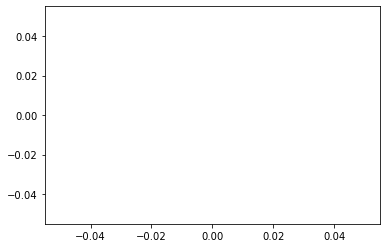

In [29]:
plt.plot(test_set, color = 'red', label = 'Real Gas Production')
plt.plot(predicted_values, color = 'blue', label = 'Predicted Gas Production')
plt.title('Gas Production Prediction')
plt.xlabel('Time')
plt.ylabel('Gas Production')
plt.legend()
plt.show()

Root Mean Square Error

In [30]:
print(np.sqrt(mean_squared_error(predicted_values,test_set)))

NameError: name 'predicted_values' is not defined